In [1]:
import sys
import os
sys.path.append("../../src")
sys.path.append("../../data")
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import IPython
from IPython import display
import pylab as pl
from scipy.io import wavfile
import pywt
from brian2 import *
from brian2hears import *

from CorInfoMaxBSS import *
from general_utils import *
from visualization_utils import * 
from bss_utils import *

import warnings
warnings.filterwarnings("ignore")

notebook_name = 'Sound Separation'

In [2]:
sound_paths = '../../data/Sounds'
sounds = []

rate, a = wavfile.read(os.path.join(sound_paths, 'MA02_04.wav'))
rate, b = wavfile.read(os.path.join(sound_paths, 'MH43_06.wav'))
rate, c = wavfile.read(os.path.join(sound_paths, 'MH43_09.wav'))
rate, d = wavfile.read(os.path.join(sound_paths, 'FA01_03.wav'))
rate, e = wavfile.read(os.path.join(sound_paths, 'FJ55_04.wav'))
rate, f = wavfile.read(os.path.join(sound_paths, 'MD19_07.wav'))
rate, g = wavfile.read(os.path.join(sound_paths, 'MH43_08.wav'))

a = a.astype('float64')
b = b.astype('float64')
c = c.astype('float64')
d = d.astype('float64')
e = e.astype('float64')
f = f.astype('float64')
g = g.astype('float64')

a_max = np.max(a)
b_max = np.max(b)
c_max = np.max(c)
d_max = np.max(d)
e_max = np.max(e)
f_max = np.max(f)
g_max = np.max(g)

a /= a_max
b /= b_max
c /= c_max
d /= d_max
e /= e_max
f /= f_max
g /= g_max

shortest = min(len(a), len(b), len(c),  len(d),  len(e), len(f), len(g))
a = a[:shortest]#[:,0]
b = b[:shortest]#[:,0]
c = c[:shortest]#[:,0]
d = d[:shortest]
e = e[:shortest]
f = f[:shortest]
g = g[:shortest]

all_sound_data = np.stack((a, b, c, d, e, f, g))

print(all_sound_data.shape)
display_matrix(np.corrcoef(all_sound_data))

(7, 32851)


<IPython.core.display.Math object>

# Check Linearity of Gammatone

In [3]:
# nbr_center_frequencies = 100
# b1 = 1.019  #factor determining the time constant of the filters
# #center frequencies with a spacing following an ERB scale
# center_frequencies = erbspace(100*Hz, 1000*Hz, nbr_center_frequencies)

In [4]:
# gammatone_a = Gammatone(Sound(a), center_frequencies, b=b1)
# gammatone_2a = Gammatone(Sound(2*a), center_frequencies, b=b1)

# gt_mon_a = gammatone_a.process().T
# gt_mon_2a = gammatone_2a.process().T

# np.linalg.norm(2*gt_mon_a - gt_mon_2a)

In [5]:
# gammatone_a = Gammatone(Sound(a), center_frequencies, b=b1)
# gammatone_b = Gammatone(Sound(b), center_frequencies, b=b1)
# gammatone_a_plus_2b = Gammatone(Sound(a + 2*b), center_frequencies, b=b1)

# gt_mon_a = gammatone_a.process().T
# gt_mon_b = gammatone_b.process().T
# gt_mon_a_plus_2b = gammatone_a_plus_2b.process().T

# np.linalg.norm((gt_mon_a + 2*gt_mon_b) - gt_mon_a_plus_2b)

In [6]:
# nbr_center_frequencies = 50
# b1 = 1.019  #factor determining the time constant of the filters
# #center frequencies with a spacing following an ERB scale
# center_frequencies = erbspace(100*Hz, 1000*Hz, nbr_center_frequencies)

# gammatone_a = Gammatone(Sound(a), center_frequencies, b=b1)
# gammatone_b = Gammatone(Sound(b), center_frequencies, b=b1)
# gt_mon_a = gammatone_a.process().T
# gt_mon_b = gammatone_b.process().T

# Scwt = np.stack((gt_mon_a.reshape(-1), gt_mon_b.reshape(-1)))

# NumberofMixtures = 2
# NumberofSources = S.shape[0]
# A = np.random.randn(NumberofMixtures,NumberofSources)
# AS = A @ S

# gammatone_aa = Gammatone(Sound(AS[0,:]), center_frequencies, b=b1)
# gammatone_ab = Gammatone(Sound(AS[1,:]), center_frequencies, b=b1)
# gt_mon_aa = gammatone_aa.process().T
# gt_mon_ab = gammatone_ab.process().T

# AScwt = np.stack((gt_mon_aa.reshape(-1), gt_mon_ab.reshape(-1)))

# np.linalg.norm(AScwt - A @ Scwt)

# Linearity is Okay According to Above Checks

(2, 328510)
[[1.         0.00304748]
 [0.00304748 1.        ]]
[[1.         0.01498065]
 [0.01498065 1.        ]]


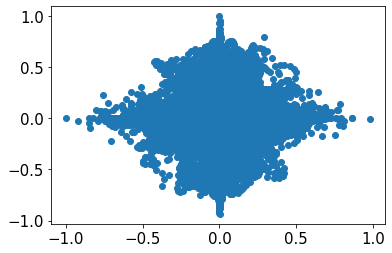

In [7]:
# S = np.stack((f,g))
# S = np.stack((c,f))
S = all_sound_data[np.random.choice(all_sound_data.shape[0], size=2, replace=False, p=None),:]
nbr_center_frequencies = 10
b1 = 1.019  #factor determining the time constant of the filters
#center frequencies with a spacing following an ERB scale
center_frequencies = erbspace(20*Hz, 20000*Hz, nbr_center_frequencies)

gammatone_a = Gammatone(Sound(S[0,:], samplerate = 16 * khertz), center_frequencies, b=b1)
gammatone_b = Gammatone(Sound(S[1,:], samplerate = 16 * khertz), center_frequencies, b=b1)
gt_mon_a = gammatone_a.process().T
gt_mon_b = gammatone_b.process().T

S[0,:] /= np.abs(gt_mon_a).max()
S[1,:] /= np.abs(gt_mon_b).max()

gammatone_a = Gammatone(Sound(S[0,:], samplerate = 16 * khertz), center_frequencies, b=b1)
gammatone_b = Gammatone(Sound(S[1,:], samplerate = 16 * khertz), center_frequencies, b=b1)
gt_mon_a = gammatone_a.process().T
gt_mon_b = gammatone_b.process().T

Scwt = np.stack((gt_mon_a.reshape(-1), gt_mon_b.reshape(-1)))
print(Scwt.shape)
plt.scatter(Scwt[0,:], Scwt[1,:])

print(np.corrcoef(S))
print(np.corrcoef(Scwt))

In [8]:
gt_mon_a.shape

(10, 32851)

In [9]:
np.corrcoef(S),np.corrcoef(Scwt)

(array([[1.        , 0.00304748],
        [0.00304748, 1.        ]]),
 array([[1.        , 0.01498065],
        [0.01498065, 1.        ]]))

In [10]:
# np.random.seed(250)
NumberofMixtures = 2
NumberofSources = S.shape[0]

A = np.random.randn(NumberofMixtures,NumberofSources)
X = np.dot(A,S)
SNR = 40

A, X = WSM_Mixing_Scenario(S, NumberofMixtures=NumberofMixtures, INPUT_STD=None)

Xnoisy, NoisePart = addWGN(X, SNR, return_noise=True)

SNRinp = 10 * np.log10(
    np.sum(np.mean((Xnoisy - NoisePart) ** 2, axis=1))
    / np.sum(np.mean(NoisePart**2, axis=1))
)

print("The following is the mixture matrix A")
display_matrix(A)
print("Input SNR is : {}".format(SNRinp))

print("Row standard deviation of mixtures : {}".format(X.std(1)))

The following is the mixture matrix A


<IPython.core.display.Math object>

Input SNR is : 39.98772111096326
Row standard deviation of mixtures : [0.52506609 0.52506609]


In [11]:
X.shape, S.shape

((2, 32851), (2, 32851))

In [12]:
gammatone_X1 = Gammatone(Sound(X[0,:], samplerate = 16 * khertz), center_frequencies, b=b1)
gammatone_X2 = Gammatone(Sound(X[1,:], samplerate = 16 * khertz), center_frequencies, b=b1)
gt_mon_X1 = gammatone_X1.process().T
gt_mon_X2 = gammatone_X2.process().T

Xcwt = np.stack((gt_mon_X1.reshape(-1), gt_mon_X2.reshape(-1)))

print(Xcwt.shape)

(2, 328510)


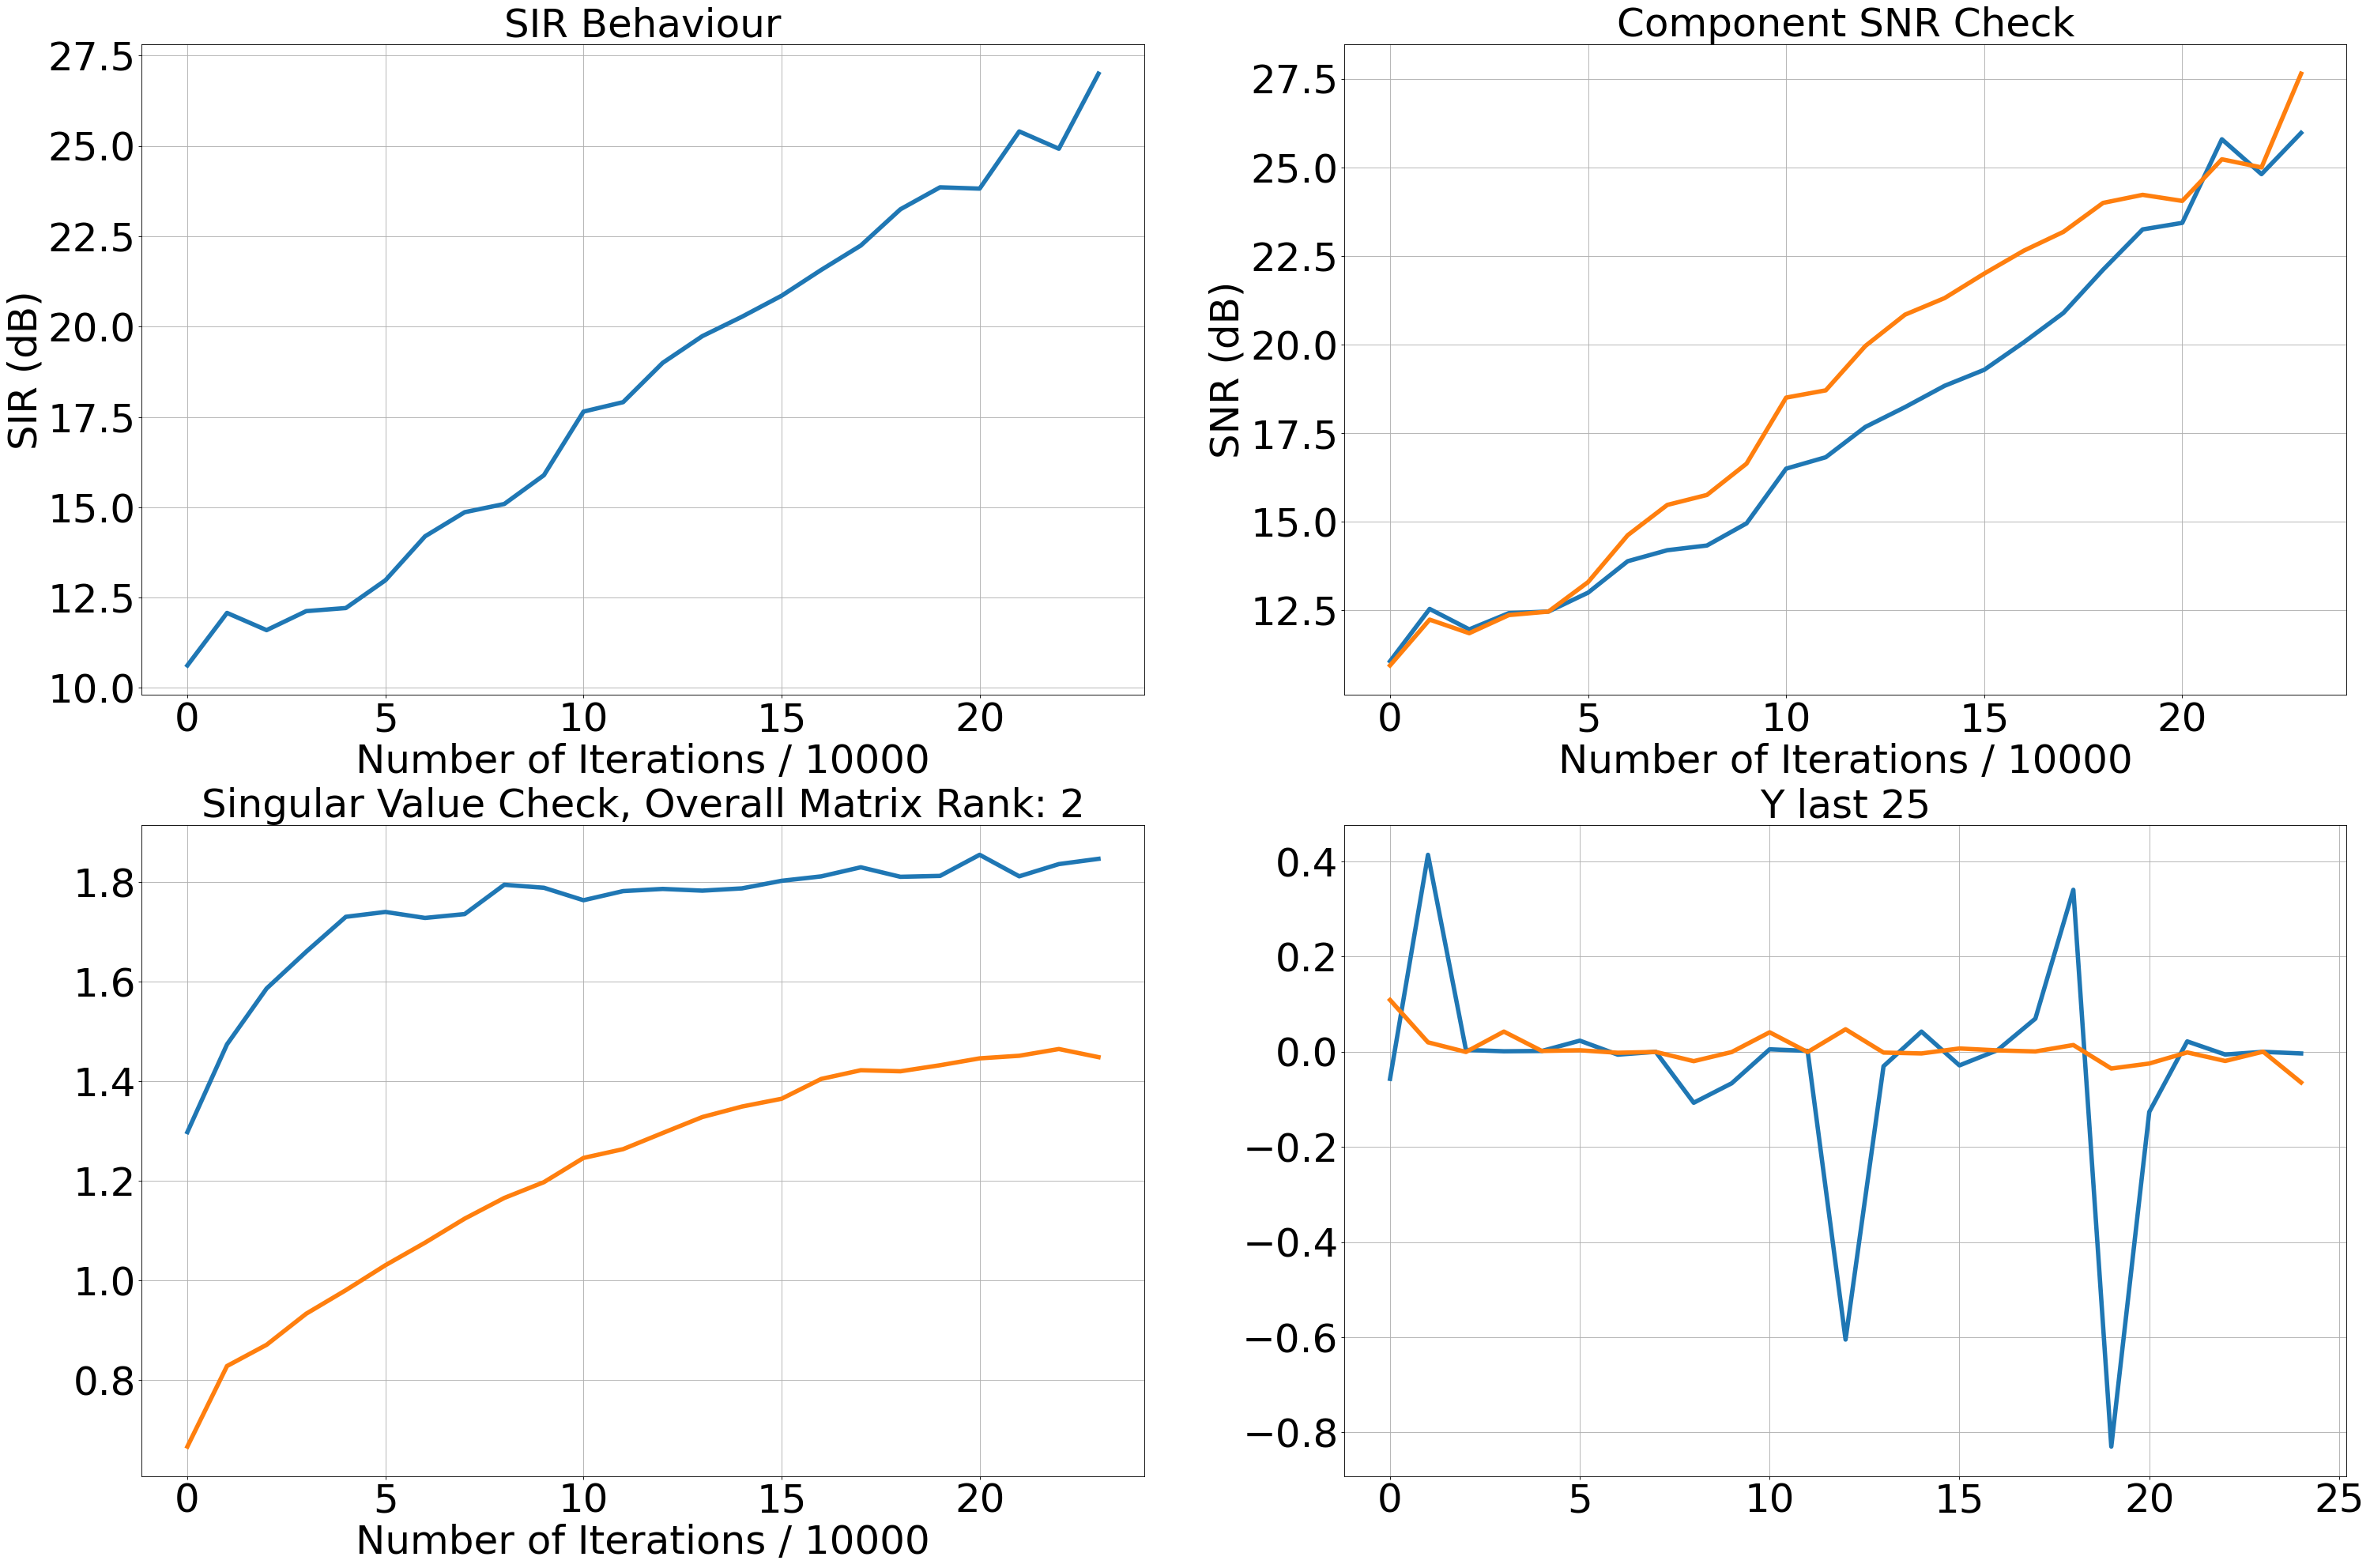

 71%|███████   | 232075/328510 [02:21<00:51, 1870.02it/s]

In [ ]:
s_dim = S.shape[0]
x_dim = X.shape[0]
debug_iteration_point = 10000

lambday = 1 - 1e-1/50
lambdae = 1 - 1e-1/50
# Inverse output covariance
By = 1 * np.eye(s_dim)
# Inverse error covariance
Be = 2000 * np.eye(s_dim)

modelCorInfoMax = OnlineCorInfoMax( s_dim = s_dim, x_dim = x_dim, muW = 30*1e-3, lambday = lambday,
                                    lambdae = lambdae, By = By, Be = Be, neural_OUTPUT_COMP_TOL = 1e-6,
                                    set_ground_truth = True, S = Scwt, A = A)
with Timer() as t:
    modelCorInfoMax.fit_batch_sparse(       X = Xcwt, n_epochs = 1, neural_dynamic_iterations = 500,
                                            plot_in_jupyter = True,
                                            neural_lr_start = 0.25,
                                            neural_lr_stop = 0.01, 
                                            debug_iteration_point = debug_iteration_point, 
                                            shuffle = True)